# Explore pseudo experiments

This notebook explores the new pseudo-experiments created using the "experiment_lvl" simulation. In this simulation we are preserving the experiment type but not the actual experiment so the relationship between samples within an experiment are preserved but the genes that are expressed will be different.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import random
import glob
from sklearn import preprocessing

sys.path.append("../")
from functions import utils
import generate_labeled_data

import warnings
warnings.filterwarnings(action='ignore')

from numpy.random import seed
randomState = 123
seed(randomState)

Using TensorFlow backend.


In [2]:
# Read in config variables
config_file = os.path.abspath(os.path.join(os.getcwd(),"../configs", "config_Pa_experiment_limma.tsv"))
params = utils.read_config(config_file)

In [3]:
# Load parameters
num_runs = 100
dataset_name = params["dataset_name"]
num_simulated_experiments = params["num_simulated_experiments"]
NN_architecture = params["NN_architecture"]
local_dir = params["local_dir"]

In [4]:
# Input files
base_dir = os.path.abspath(
  os.path.join(
      os.getcwd(), "../"))    # base dir on repo

# Load experiment id file
# Contains ALL experiment ids
experiment_ids_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    "experiment_ids.txt")

normalized_data_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "input",
    "train_set_normalized.pcl")

original_data_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "Pa_compendium_02.22.2014.pcl")

mapping_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    "sample_annotations.tsv")

## Generate simulated data with labels

Simulate a compendia by experiment and label each new sample with the experiment id that it originated from

In [5]:
# Load experiment id file
# Contains ALL experiment ids
base_dir = os.path.abspath(
  os.path.join(
      os.getcwd(), "../"))    # base dir on repo

experiment_ids_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    "experiment_ids.txt")

In [6]:
# Generate simulated data
generate_labeled_data.simulate_compendium_labeled(experiment_ids_file, 
                                                  num_simulated_experiments,
                                                  normalized_data_file,
                                                  NN_architecture,
                                                  dataset_name,
                                                  local_dir,
                                                  base_dir)

Normalized gene expression data contains 950 samples and 5549 genes
Return: simulated gene expression data containing 5346 samples and 5550 genes


## Process data

In [7]:
# Load simulated data
simulated_data_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "simulated_data_labeled.txt.xz")

In [8]:
# Read data
original_data = pd.read_table(
    original_data_file,
    header=0,
    sep='\t',
    index_col=0).T

simulated_data = pd.read_table(
    simulated_data_file,
    header=0,
    sep='\t',
    index_col=0)

print(original_data.shape)
print(simulated_data.shape)

(950, 5549)
(5346, 5550)


In [9]:
original_data.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,9.620090,10.575783,9.296287,9.870074,8.512268,7.903954,7.039473,10.209826,9.784684,5.485688,...,7.740609,9.730384,10.516061,10.639916,9.746849,5.768592,9.224442,11.512176,12.529719,11.804896
54375-4-05.CEL,9.327996,10.781977,9.169988,10.269239,7.237999,7.663758,6.855194,9.631573,9.404465,5.684067,...,7.127736,9.687607,10.199612,9.457152,9.318372,5.523898,7.911031,10.828271,11.597643,11.268520
AKGlu_plus_nt_7-8-09_s1.CEL,9.368599,10.596248,9.714517,9.487155,7.804147,7.681754,6.714411,9.497601,9.523126,5.766331,...,7.343241,9.717993,10.419979,10.164667,10.305005,5.806817,8.575730,10.858250,12.255953,11.309662
anaerobic_NO3_1.CEL,9.083292,9.897050,8.068471,7.310218,6.723634,7.141148,8.492302,7.740717,7.640251,5.267993,...,7.374740,8.287819,9.437053,8.936576,9.418147,5.956482,7.481406,7.687985,9.205525,9.395773
anaerobic_NO3_2.CEL,8.854901,9.931392,8.167126,7.526595,6.864015,7.154523,8.492109,7.716687,7.268094,5.427256,...,7.425398,8.588969,9.313851,8.684602,9.272818,5.729479,7.699086,7.414436,9.363494,9.424762


In [10]:
simulated_data.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,experiment_id
0,0.649,0.707,0.453,0.678,0.305,0.465,0.375,0.544,0.437,0.403,...,0.497,0.673,0.509,0.645,0.174,0.462,0.229,0.508,0.687,E-MEXP-2606_0
1,0.622,0.690,0.438,0.676,0.323,0.500,0.362,0.551,0.445,0.353,...,0.511,0.640,0.516,0.644,0.188,0.487,0.264,0.524,0.678,E-MEXP-2606_0
2,0.641,0.703,0.451,0.671,0.325,0.458,0.370,0.549,0.449,0.387,...,0.512,0.684,0.523,0.655,0.169,0.453,0.256,0.538,0.695,E-MEXP-2606_0
3,0.573,0.650,0.402,0.692,0.301,0.533,0.369,0.573,0.432,0.299,...,0.534,0.534,0.494,0.622,0.227,0.529,0.303,0.489,0.647,E-MEXP-2606_0
4,0.617,0.676,0.459,0.665,0.334,0.469,0.368,0.545,0.442,0.351,...,0.527,0.679,0.529,0.647,0.186,0.459,0.289,0.553,0.686,E-MEXP-2606_0


In [11]:
# 0-1 normalize per gene
scaler = preprocessing.MinMaxScaler()
original_data_scaled = scaler.fit_transform(original_data)
original_data_scaled_df = pd.DataFrame(original_data_scaled,
                                columns=original_data.columns,
                                index=original_data.index)

original_data_scaled_df.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.466871,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.352020,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.392405,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.398308,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.407801,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814


In [12]:
# Re-scale simulated data back into the same range as the original data
simulated_data_numeric = simulated_data.drop(columns=['experiment_id'])
simulated_data_scaled = scaler.inverse_transform(simulated_data_numeric)

simulated_data_scaled_df = pd.DataFrame(simulated_data_scaled,
                                columns=simulated_data_numeric.columns,
                                index=simulated_data_numeric.index)

simulated_data_scaled_df['experiment_id'] = simulated_data['experiment_id']
simulated_data_scaled_df.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,experiment_id
0,8.819587,10.487285,8.376346,9.317434,6.833727,7.677395,7.924795,8.651416,7.737733,6.459046,...,8.682196,9.869977,8.851870,9.175711,5.813316,7.321338,8.291288,10.100462,10.417829,E-MEXP-2606_0
1,8.713823,10.404987,8.302797,9.309152,6.911305,7.792385,7.871545,8.682983,7.774290,6.244121,...,8.753506,9.689239,8.884444,9.171770,5.876926,7.414908,8.462489,10.199493,10.353151,E-MEXP-2606_0
2,8.788250,10.467921,8.366539,9.288449,6.919925,7.654397,7.904314,8.673964,7.792569,6.390270,...,8.758600,9.930223,8.917017,9.215116,5.790598,7.287653,8.423357,10.286145,10.475320,E-MEXP-2606_0
3,8.521882,10.211342,8.126278,9.375404,6.816487,7.900805,7.900218,8.782193,7.714885,6.012002,...,8.870659,9.108687,8.782070,9.085079,6.054123,7.572106,8.653256,9.982863,10.130371,E-MEXP-2606_0
4,8.694238,10.337211,8.405766,9.263605,6.958714,7.690537,7.896122,8.655925,7.760581,6.235524,...,8.835004,9.902838,8.944937,9.183592,5.867838,7.310110,8.584776,10.378987,10.410642,E-MEXP-2606_0


In [13]:
# Read in metadata
metadata = pd.read_table(
    mapping_file, 
    header=0, 
    sep='\t', 
    index_col=0)

metadata.head()

,sample_name,ml_data_source,description,nucleic_acid,medium,genotype,od,growth_setting_1,growth_setting_2,strain,temperature,treatment,additional_notes,variant_phenotype,abx_marker,biotic_int_lv_2,biotic_int_lv_1
experiment,,,,,,,,,,,,,,,,,
E-GEOD-46947,GSM1141730 1,GSM1141730_PA01_ZnO_PZO_.CEL,Pseudomonas aeruginosa PAO1 LB aerated 5 h wi...,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,1 mM ZnO nanoparticles,Grown for 5h,NaN,NaN,NaN,NaN
E-GEOD-46947,GSM1141729 1,GSM1141729_PA01_none_PC_.CEL,Pseudomonas aeruginosa PAO1 LB aerated 5 h,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,NaN,Grown for 5h,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608059 1,GSM1608059_Planktonic_1.CEL,PAO1 WT. Planktonic. Rep1,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608060 1,GSM1608060_Planktonic_2.CEL,PAO1 WT. Planktonic. Rep2,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
E-GEOD-65882,GSM1608061 1,GSM1608061_Planktonic_3.CEL,PAO1 WT. Planktonic. Rep3,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN


In [14]:
map_experiment_sample = metadata[['sample_name', 'ml_data_source']]
map_experiment_sample.head()

,sample_name,ml_data_source
experiment,,
E-GEOD-46947,GSM1141730 1,GSM1141730_PA01_ZnO_PZO_.CEL
E-GEOD-46947,GSM1141729 1,GSM1141729_PA01_none_PC_.CEL
E-GEOD-65882,GSM1608059 1,GSM1608059_Planktonic_1.CEL
E-GEOD-65882,GSM1608060 1,GSM1608060_Planktonic_2.CEL
E-GEOD-65882,GSM1608061 1,GSM1608061_Planktonic_3.CEL


# Explore experiment E-GEOD-51409

This experiment measures the transcriptome of *P. aeruginosa* under two different growth conditions: 28 degrees and 37 degress.

In [15]:
# Get experiment id
experiment_id = 'E-GEOD-51409'

In [16]:
# Get original samples associated with experiment_id
selected_mapping = map_experiment_sample.loc[experiment_id]
original_selected_sample_ids = list(selected_mapping['ml_data_source'].values)

selected_original_data = original_data.loc[original_selected_sample_ids]

selected_original_data.head(10)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM1244967_PAO1-22-replicate-01.CEL,9.049257,9.927143,8.885547,8.804660,5.988185,7.764461,8.350282,7.774165,7.774105,5.510923,...,9.356331,7.377822,9.644671,7.429156,7.654936,6.131965,6.241217,7.684121,9.072845,10.695175
GSM1244968_PAO1-22-replicate-02.CEL,8.833167,9.917035,9.009681,8.900852,6.096402,7.749163,8.319773,8.301315,7.600733,5.706577,...,9.486076,6.894396,9.723022,7.788555,7.605215,6.231041,6.303251,7.815412,8.896422,10.714222
GSM1244969_PAO1-22-replicate-03.CEL,8.884647,9.907316,8.737792,8.628758,6.270097,7.989337,8.304787,7.953646,7.694889,5.679747,...,9.080317,7.296979,9.655950,7.345836,7.659305,5.702764,6.390429,7.863996,9.196426,10.671757
GSM1244970_PAO1-37-replicate-01.CEL,8.778351,9.872437,8.755126,8.662006,7.212951,8.426300,8.670188,8.653405,7.737566,5.695070,...,9.153401,7.927784,9.572730,8.284933,8.580799,5.959742,6.265907,7.824123,10.907826,12.177075
GSM1244971_PAO1-37-replicate-02.CEL,9.061243,9.828194,8.342299,8.842026,6.465854,7.970151,8.432160,8.226710,7.877492,5.785088,...,9.337408,8.013215,9.553362,8.590636,8.628973,5.778791,6.830793,8.052581,10.929728,12.152272
GSM1244972_PAO1-37-replicate-03.CEL,8.808541,10.165703,8.627964,8.689108,6.905749,8.306635,8.780996,8.567739,7.190508,5.742351,...,9.013357,7.840225,9.405921,8.208101,8.480249,6.232756,5.991988,7.848818,10.879207,12.175344


In [17]:
# Want to get simulated samples associated with experiment_id
# Since we sampled experiments with replacement, we want to find the first set of samples matching the experiment id
match_experiment_id = ''
for experiment_name in simulated_data_scaled_df['experiment_id'].values:
    if experiment_name.split("_")[0] == experiment_id:
        match_experiment_id = experiment_name 

In [18]:
# Get simulated samples associated with experiment_id
selected_simulated_data = simulated_data_scaled_df[simulated_data_scaled_df['experiment_id'] == match_experiment_id]

# Map sample ids from original data to simulated data
selected_simulated_data.index = original_selected_sample_ids
selected_simulated_data = selected_simulated_data.drop(columns=['experiment_id'])

selected_simulated_data.head(5)

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM1244967_PAO1-22-replicate-01.CEL,8.298603,10.182295,8.297893,9.429233,6.833727,7.733248,8.174660,8.051645,7.193946,5.603645,...,6.802119,8.259426,8.856749,7.674571,7.638906,6.235865,6.434294,8.853806,9.419624,9.131456
GSM1244968_PAO1-22-replicate-02.CEL,8.290769,10.138725,8.288087,9.404389,6.825107,7.766102,8.145987,8.015568,7.166528,5.603645,...,6.871490,8.208490,8.840318,7.665264,7.627084,6.258582,6.404352,8.824457,9.413434,9.210507
GSM1244969_PAO1-22-replicate-03.CEL,8.314272,10.225865,8.332216,9.458218,6.859586,7.710250,8.174660,8.096740,7.230503,5.616541,...,6.775438,8.310362,8.878657,7.693184,7.650727,6.222234,6.460494,8.897829,9.444382,9.109896
GSM1244970_PAO1-37-replicate-01.CEL,8.380864,10.196819,8.337120,9.197353,7.264719,7.509838,7.965756,8.385352,7.504681,5.921734,...,6.770102,8.743319,9.097733,8.367921,8.490059,6.453954,6.913373,9.494587,10.162356,9.727930
GSM1244971_PAO1-37-replicate-02.CEL,8.400450,10.211342,8.356733,9.213916,7.251789,7.513123,7.969852,8.389861,7.509251,5.908838,...,6.802119,8.712757,9.130594,8.377228,8.497940,6.435780,6.909630,9.494587,10.162356,9.778236


In [19]:
# Save selected samples
# This will be used as input into R script to identify differentially expressed genes
selected_simulated_data_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "selected_simulated_data_"+experiment_id+".txt")

selected_original_data_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "selected_original_data_"+experiment_id+".txt")

selected_simulated_data.to_csv(
        selected_simulated_data_file, float_format='%.3f', sep='\t')

selected_original_data.to_csv(
        selected_original_data_file, float_format='%.3f', sep='\t')

## Find differentially expressed genes

This will be the set of representative results for this analysis

In [20]:
%load_ext rpy2.ipython
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [21]:
# mapping sample ids to cluster label
metadata_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "metadata_deg_temp.txt")

In [34]:
%%R -i metadata_file -i experiment_id -i selected_simulated_data_file

# Run R script to identify differentially expressed genes
source("/home/alexandra/Documents/Repos/simulate-expression-compendia/Differential_expression/DE_analysis_run.R")

run_output <- find_DEGs_run(metadata_file,
                              experiment_id, 
                              selected_simulated_data_file,
                              "simulated",
                              "example")

cat(run_output)

2018

In [35]:
%%R -i metadata_file -i experiment_id -i selected_original_data_file

# Run R script to identify differentially expressed genes
source("/home/alexandra/Documents/Repos/simulate-expression-compendia/Differential_expression/DE_analysis_run.R")

run_output <- find_DEGs_run(metadata_file,
                              experiment_id, 
                              selected_original_data_file,
                              "original",
                              "example")

cat(run_output)

451

## Visualize gene expression data using top DEGs

In [36]:
# Output files
heatmap_original_file = os.path.join(
    base_dir,
    "Pseudomonas",
    "results",
    "DE_heatmap_original_"+experiment_id+"_example.png")

heatmap_simulated_file = os.path.join(
    base_dir,
    "Pseudomonas",
    "results",
    "DE_heatmap_simulated_"+experiment_id+"_example.png")

original_sign_DEG_file = os.path.join(
    base_dir,
    "Pseudomonas",
    "results",
    "sign_DEG_original_"+experiment_id+"_example.txt")

simulated_sign_DEG_file = os.path.join(
    base_dir,
    "Pseudomonas",
    "results",
    "sign_DEG_simulated_"+experiment_id+"_example.txt")

In [37]:
# Input files
DE_stats_simulated_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "output_simulated",
    "DE_stats_simulated_data_"+experiment_id+"_example.txt")

DE_stats_original_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "output_original",
    "DE_stats_original_data_"+experiment_id+"_example.txt")

In [38]:
# Read data
DE_stats_simulated_data = pd.read_table(
    DE_stats_simulated_file,
    header=0,
    sep='\t',
    index_col=0)

DE_stats_original_data = pd.read_table(
    DE_stats_original_file,
    header=0,
    sep='\t',
    index_col=0)

DE_stats_simulated_data.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B
PA3229,0.998000,7.222000,79.792418,3.856255e-11,8.693838e-08,16.476386
PA4881,1.186667,6.110333,76.929079,4.912461e-11,8.693838e-08,16.271234
PA2493,0.884000,5.941000,72.033227,7.593662e-11,8.693838e-08,15.892463
PA4149,0.871333,6.905667,68.557790,1.053610e-10,8.693838e-08,15.599886
PA2359,0.931000,7.043167,68.351116,1.074888e-10,8.693838e-08,15.581817


In [39]:
# Get the number of genes that p-value < 0.05/5549
# AND log2FC > 1
adj_threshold = 0.05/5549
sign_DEG_simulated = DE_stats_simulated_data[
    (abs(DE_stats_simulated_data['logFC'])>1) & (DE_stats_simulated_data['P.Value']<adj_threshold)]
print(sign_DEG_simulated.shape[0])

# Sort significant DEGs and select top 30 genes
sign_DEG_simulated.sort_values(by=['P.Value'])
sign_DEG_simulated = sign_DEG_simulated.iloc[0:30,]

sign_DEG_simulated.to_csv(
        simulated_sign_DEG_file, float_format='%.3f', sep='\t')

sign_DEG_simulated.head(10)

14


,logFC,AveExpr,t,P.Value,adj.P.Val,B
PA4881,1.186667,6.110333,76.929079,4.912461e-11,8.693838e-08,16.271234
PA3126,1.008333,10.002167,67.210999,1.201542e-10,8.693838e-08,15.480725
PA1970,1.210000,6.100000,65.931078,1.364684e-10,8.693838e-08,15.364311
PA0896,-1.088333,8.500833,-53.982611,5.126838e-10,9.324276e-08,14.104194
PA2007,-1.213667,10.253833,-51.882139,6.666451e-10,1.109186e-07,13.844522
PA0865,-1.072333,9.780833,-51.497054,7.003267e-10,1.110318e-07,13.795465
PA5470,1.072333,7.252833,42.450286,2.512564e-09,1.640261e-07,12.492885
PA2008,-1.077000,10.449833,-39.991793,3.726671e-09,1.863276e-07,12.080373
PA2006,-1.168667,8.953333,-29.298450,2.902353e-08,4.421157e-07,9.873339
PA4354,1.149667,6.347167,26.432893,5.713547e-08,6.359023e-07,9.128563


In [40]:
DE_stats_original_data.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B
PA4175,-4.156000,10.562667,-42.035258,6.313727e-12,3.503487e-08,17.540678
PA0887,5.272667,9.499667,38.232066,1.518100e-11,4.211970e-08,16.849060
PA1914,-3.426667,9.025333,-32.831680,6.197397e-11,1.037664e-07,15.666580
PA0534,-3.213000,9.886167,-32.169062,7.480010e-11,1.037664e-07,15.502182
PA4648,-3.226000,10.733667,-31.139338,1.009716e-10,1.120582e-07,15.237142


In [41]:
# Get the number of genes that p-value < 0.05/5549
# and log2FC > 1
adj_threshold = 0.05/5549
sign_DEG_original = DE_stats_original_data[
    (abs(DE_stats_original_data['logFC'])>1) & (DE_stats_original_data['P.Value']<adj_threshold)]
print(sign_DEG_original.shape[0])

# Sort significant DEGs and select top 30 genes
sign_DEG_original.sort_values(by=['P.Value'])
sign_DEG_original = sign_DEG_original.iloc[0:14,]


sign_DEG_original.to_csv(
        original_sign_DEG_file, float_format='%.3f', sep='\t')

sign_DEG_original.head(10)

408


,logFC,AveExpr,t,P.Value,adj.P.Val,B
PA4175,-4.156000,10.562667,-42.035258,6.313727e-12,3.503487e-08,17.540678
PA0887,5.272667,9.499667,38.232066,1.518100e-11,4.211970e-08,16.849060
PA1914,-3.426667,9.025333,-32.831680,6.197397e-11,1.037664e-07,15.666580
PA0534,-3.213000,9.886167,-32.169062,7.480010e-11,1.037664e-07,15.502182
PA4648,-3.226000,10.733667,-31.139338,1.009716e-10,1.120582e-07,15.237142
PA3234,3.262667,8.826333,28.785259,2.083130e-10,1.926549e-07,14.583768
PA1245,2.901667,9.017500,28.003063,2.684290e-10,2.018870e-07,14.350732
PA1432,2.773000,9.649500,27.587966,3.079593e-10,2.018870e-07,14.223583
PA2939,-2.783667,10.368167,-27.258658,3.439175e-10,2.018870e-07,14.120936
PA0899,-3.250000,8.995000,-27.092334,3.638259e-10,2.018870e-07,14.068482


In [42]:
# Get gene ids for significant DEGs
sim_gene_ids = list(sign_DEG_simulated.index)
original_gene_ids = list(sign_DEG_original.index)

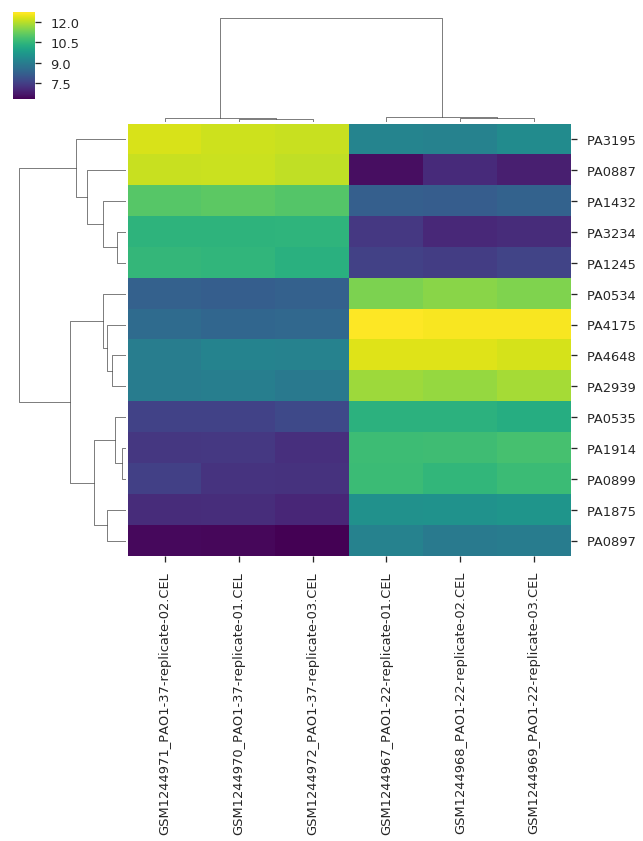

In [43]:
# Plot original data
selected_original_DEG_data = selected_original_data[original_gene_ids]
sns.set(style="ticks", context="talk")
f = sns.clustermap(selected_original_DEG_data.T, cmap="viridis")
f.savefig(heatmap_original_file, dpi=500)

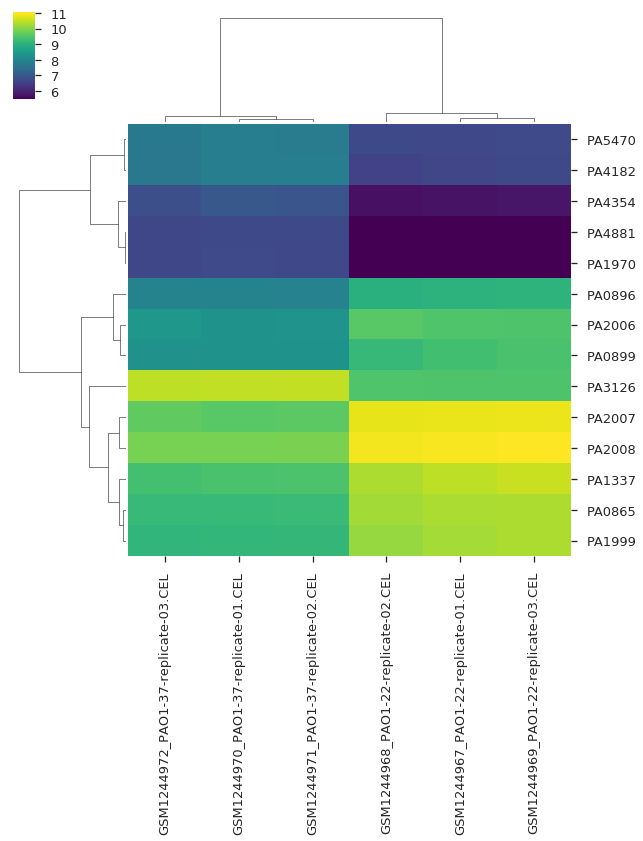

In [44]:
# Plot simulated
selected_simulated_DEG_data = selected_simulated_data[sim_gene_ids]
f = sns.clustermap(selected_simulated_DEG_data.T, cmap="viridis")
f.savefig(heatmap_simulated_file, dpi=500)

## Run differential expression analysis multiple times 

Generate different simulated datasets by shifting the experiment in the linear space different directions

In [ ]:
# Generate multiple simulated datasets
for i in range(num_runs):
    generate_labeled_data.shift_template_experiment(
        normalized_data_file,
        experiment_id,
        NN_architecture,
        dataset_name,
        local_dir,
        base_dir,
        i)

In [ ]:
%load_ext rpy2.ipython
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [ ]:
# mapping sample ids to cluster label
metadata_file = os.path.join(
    local_dir,
    "pseudo_experiment",
    "metadata_deg_temp.txt")

In [45]:
%%R -i metadata_file -i experiment_id

# Run R script to identify differentially expressed genes
source("/home/alexandra/Documents/Repos/simulate-expression-compendia/Differential_expression/DE_analysis_run.R")

num_sign_DEGs <- c()

for (i in 0:99){
  selected_simulated_data_file <- paste("/home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_", i, ".txt", sep="")
  cat(paste("running file: ", selected_simulated_data_file, "...\n", sep=""))
  
  run_output <- find_DEGs_run(metadata_file,
                              experiment_id, 
                              selected_simulated_data_file,
                              "simulated",
                              i)
  
  num_sign_DEGs <- c(num_sign_DEGs, run_output)
}

median(num_sign_DEGs)

running file: /home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_0.txt...
running file: /home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_1.txt...
running file: /home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_2.txt...
running file: /home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_3.txt...
running file: /home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_4.txt...
running file: /home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_5.txt...
running file: /home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_6.txt...
running file: /home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/selected_simulated_data_E-GEOD-51409_7.txt...
running file: /h

In [1]:
%%R
## Currently not working with current environment
## Need to upgrade to R3.6.3 but upgrade requires downgrading from py35 to py27 
## Currently running these scripts in R instead

# Run R script to identify differentially expressed genes
#source("/home/alexandra/Documents/Repos/simulate-expression-compendia/Differential_expression/find_over_representation_run.R")

#num_over_pathways <- c()

#for (i in 0:99){
#  DE_stats_simulated_data_file <- paste("/home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/output_simulated/#DE_stats_simulated_data_E-GEOD-51409_", i, ".txt", sep="")
#  cat(paste("running file: ", DE_stats_simulated_data_file, "...\n", sep=""))
  
#  run_output <- find_over_representation(DE_stats_simulated_data_file)
  
#  num_over_pathways <- c(num_over_pathways, run_output)
#}

#hist(num_over_pathways)

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R

# Run R script to identify differentially expressed genes
source("/home/alexandra/Documents/Repos/simulate-expression-compendia/Differential_expression/find_over_representation_run.R")

num_over_pathways <- c()

for (i in 0:99){
  DE_stats_control_data_file <- paste("/home/alexandra/Documents/Data/Batch_effects/pseudo_experiment/output_control/DE_stats_simulated_data_E-GEOD-51409_", i, ".txt", sep="")
  cat(paste("running file: ", DE_stats_control_data_file, "...\n", sep=""))
  
  run_output <- find_over_representation(DE_stats_control_data_file)
  
  num_over_pathways <- c(num_over_pathways, run_output)
}

hist(num_over_pathways)